In [85]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import calendar
import ast

# loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

df['job_skills'] = df['job_skills'].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) and pd.notna(x) else (x if isinstance(x, list) else [])
)

Exercise 1: Job Titles and Locations - Visualizing Overlap

In [86]:
# here we are going to know about the top jobs titles and their locations
# we will use the job_title_short and job_country columns
df['job_title_short'].value_counts().head(10)



job_title_short
Data Analyst                 196075
Data Engineer                186241
Data Scientist               172286
Business Analyst              49063
Software Engineer             44929
Senior Data Engineer          44563
Senior Data Scientist         36957
Senior Data Analyst           29216
Machine Learning Engineer     14080
Cloud Engineer                12331
Name: count, dtype: int64

In [87]:
df['job_country'].value_counts().head(10)

job_country
United States     206292
India              51088
United Kingdom     40375
France             39922
Germany            27694
Spain              25100
Singapore          23696
Sudan              21781
Netherlands        20631
Italy              17013
Name: count, dtype: int64

In [88]:
# now we want to know which job titles are most in demand in the US
df_US = df[df['job_country'] == 'United States'].copy()
df_US_Jobs = df_US['job_title_short'].value_counts().head()
df_US_Jobs


job_title_short
Data Analyst             67816
Data Scientist           58830
Data Engineer            35080
Senior Data Scientist    12946
Senior Data Analyst      11791
Name: count, dtype: int64

In [89]:
# now we want to know which job titles are most in demand in the US
df_India = df[df['job_country'] == 'India'].copy()
df_India_Jobs = df_India['job_title_short'].value_counts().head()
df_India_Jobs


job_title_short
Data Engineer            19062
Data Scientist           13279
Data Analyst              6121
Senior Data Engineer      4353
Senior Data Scientist     2486
Name: count, dtype: int64

In [90]:
# now we want to know which job titles are most in demand in the Uk
df_UK = df[df['job_country'] == 'United Kingdom'].copy()
df_UK_Jobs = df_UK['job_title_short'].value_counts().head()
df_UK_Jobs


job_title_short
Data Engineer            11807
Data Analyst             10482
Data Scientist            9148
Senior Data Engineer      3337
Senior Data Scientist     2367
Name: count, dtype: int64

In [91]:
# now we want to know which job titles are most in demand in the france
df_France = df[df['job_country'] == 'France'].copy()
df_France_Jobs = df_France['job_title_short'].value_counts().head()
df_France_Jobs


job_title_short
Data Analyst            13803
Data Engineer           10936
Data Scientist           9497
Software Engineer        1203
Senior Data Engineer     1186
Name: count, dtype: int64

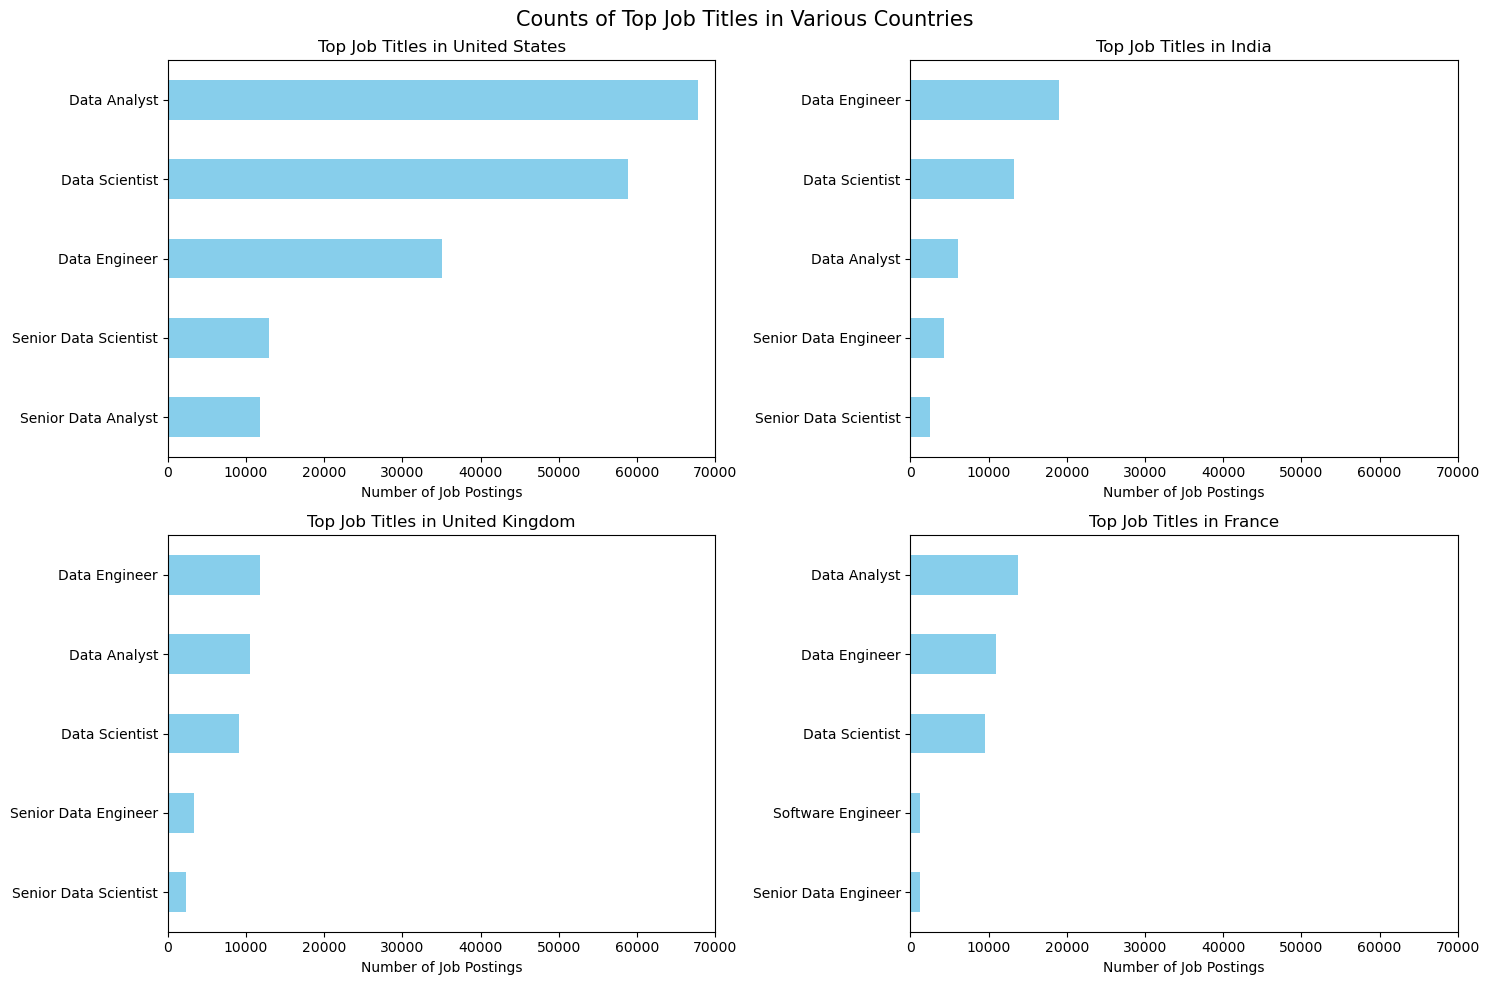

In [92]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
ax = ax.flatten()
countries = ['United States', 'India', 'United Kingdom', 'France']
job_data = [df_US_Jobs, df_India_Jobs, df_UK_Jobs, df_France_Jobs] 
for i, country in enumerate(countries):
    job_data[i].plot(kind='barh', ax=ax[i], color='skyblue')
    ax[i].set_title(f'Top Job Titles in {country}')
    ax[i].set_xlabel('Number of Job Postings')
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0,70000)
fig.suptitle('Counts of Top Job Titles in Various Countries', fontsize=15)
fig.tight_layout()
plt.show()

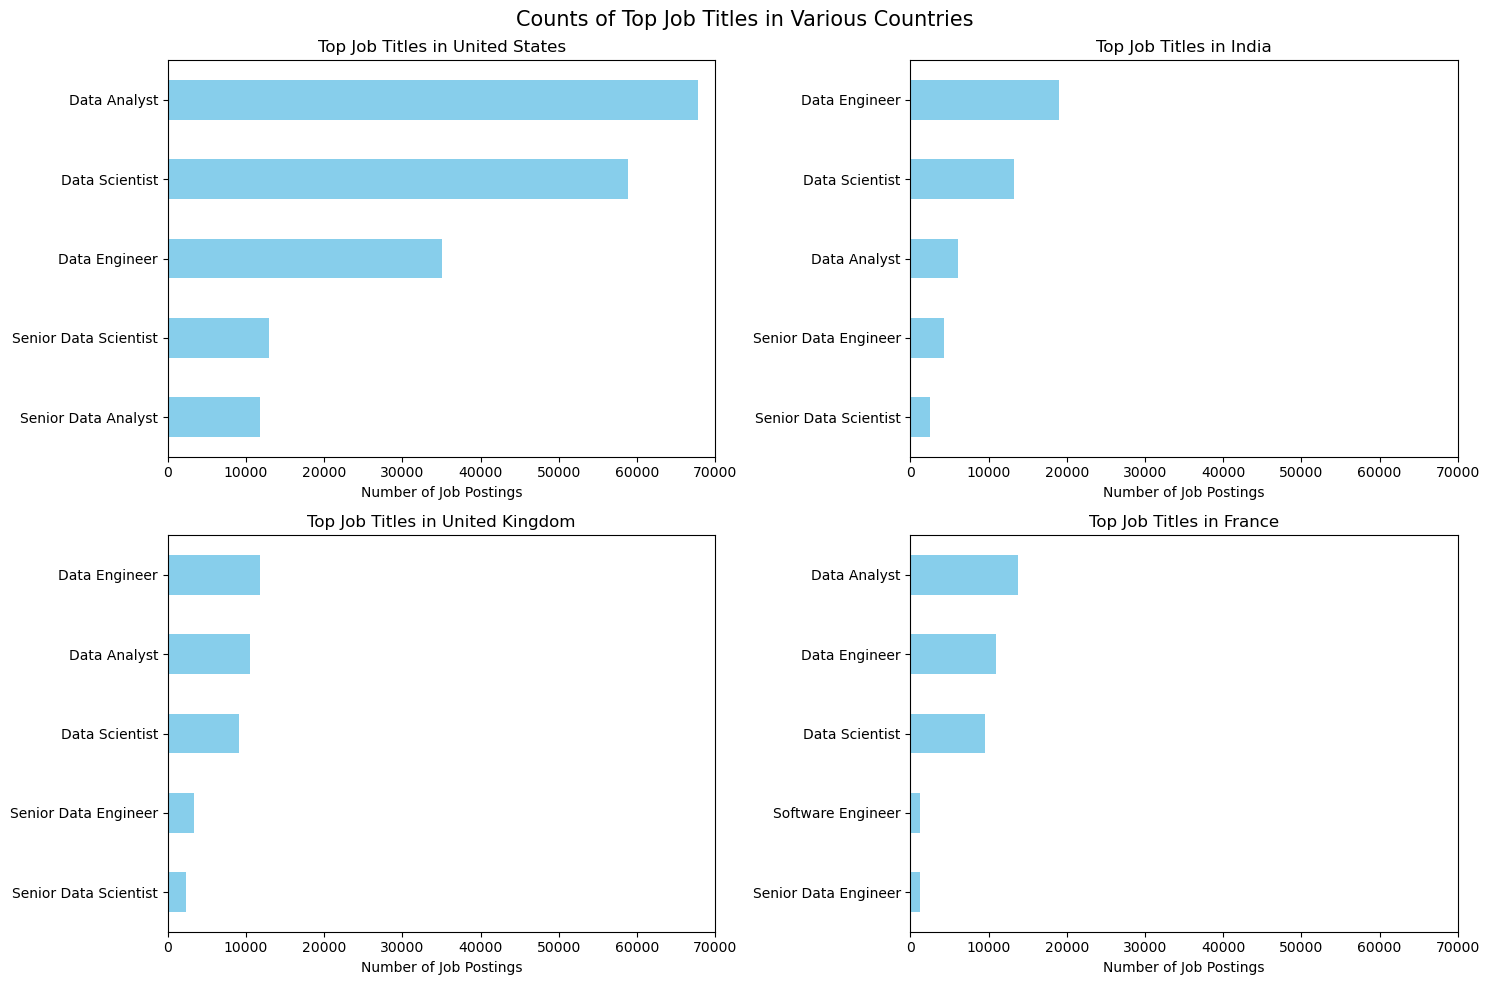

In [93]:
# more cleaner way to do the above code
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
ax = ax.flatten()
countries = df['job_country'].value_counts().head(4).index.tolist()
for i, country in enumerate(countries): 
    top_jobs = df[df['job_country'] == country]['job_title_short'].value_counts().head()
    top_jobs.plot(kind='barh', ax=ax[i], color='skyblue')
    ax[i].set_title(f'Top Job Titles in {country}')
    ax[i].set_xlabel('Number of Job Postings')
    ax[i].set_xlim(0,70000)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)
fig.suptitle('Counts of Top Job Titles in Various Countries', fontsize=15)
fig.tight_layout()
plt.show()



Exercise 2: job schedule typw distribution by company


In [94]:
df


,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,[],None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785736,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Pekerjaan tetap,False,Singapore,2023-03-13 06:16:16,False,False,Singapore,None,NaN,NaN,CAREERSTAR INTERNATIONAL PTE. LTD.,"[bash, python, perl, linux, unix, kubernetes, ...","{'os': ['linux', 'unix'], 'other': ['kubernete..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,"[sas, sas, sql, excel]","{'analyst_tools': ['sas', 'excel'], 'programmi..."
785738,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Pekerjaan tetap,False,Malaysia,2023-03-12 06:32:36,False,False,Malaysia,None,NaN,NaN,Lendlease Corporation,"[powerpoint, excel]","{'analyst_tools': ['powerpoint', 'excel']}"
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,"[python, go, nosql, sql, mongo, shell, mysql, ...","{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."


In [95]:
Top_companies = df['company_name'].value_counts().head(10)
Top_companies


company_name
Emprego                6664
Booz Allen Hamilton    2879
Dice                   2827
Harnham                2547
Insight Global         2254
Citi                   2164
Confidenziale          2040
Listopro               1984
Capital One            1946
Walmart                1863
Name: count, dtype: int64

In [96]:
df_js = df['job_schedule_type'].value_counts()
df_js


job_schedule_type
Full-time                                701727
Contractor                                34793
Internship                                 8742
Part-time                                  7881
Full-time and Part-time                    6287
Full-time and Temp work                    2603
Full-time and Internship                   2340
Full-time and Contractor                   2292
Contractor and Temp work                   2283
Temp work                                  2169
Full-time, Part-time, and Internship        264
Part-time and Internship                    255
Temp work and Internship                    211
Full-time, Contractor, and Temp work        194
Full-time, Temp work, and Internship        173
Part-time and Contractor                    160
Full-time, Part-time, and Temp work         131
Full-time, Part-time, and Contractor        119
Part-time and Temp work                     111
Pekerjaan tetap                              59
Volunteer             

In [97]:
# Step 1: Convert to string and replace NaN
df["job_schedule_type"] = df["job_schedule_type"].fillna("").astype(str)

# Step 2: Normalize separators (replace " and " with ",")
df["job_schedule_type"] = df["job_schedule_type"].str.replace(" and ", ",", regex=False)

# Step 3: Split into lists (ignore empty strings)
df["job_schedule_type"] = df["job_schedule_type"].apply(
    lambda x: [s.strip() for s in x.split(",") if s.strip()]
)

# Step 4: Explode into rows
df_exploded = df.explode("job_schedule_type")

print(df_exploded.head(10))


        job_title_short                                          job_title  \
0  Senior Data Engineer  Senior Clinical Data Engineer / Principal Clin...   
1          Data Analyst                                       Data Analyst   
2         Data Engineer  Data Engineer/Scientist/Analyst, Mid or Senior...   
3         Data Engineer  LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...   
4         Data Engineer                             Data Engineer- Sr Jobs   
5         Data Engineer                                  GCP Data Engineer   
5         Data Engineer                                  GCP Data Engineer   
6  Senior Data Engineer                  Senior Data Engineer  - GCP Cloud   
7         Data Engineer                                      Data Engineer   
8      Business Analyst           Technology & Operations Business Analyst   

                   job_location             job_via job_schedule_type  \
0                 Watertown, CT     via Work Nearby         Full-tim

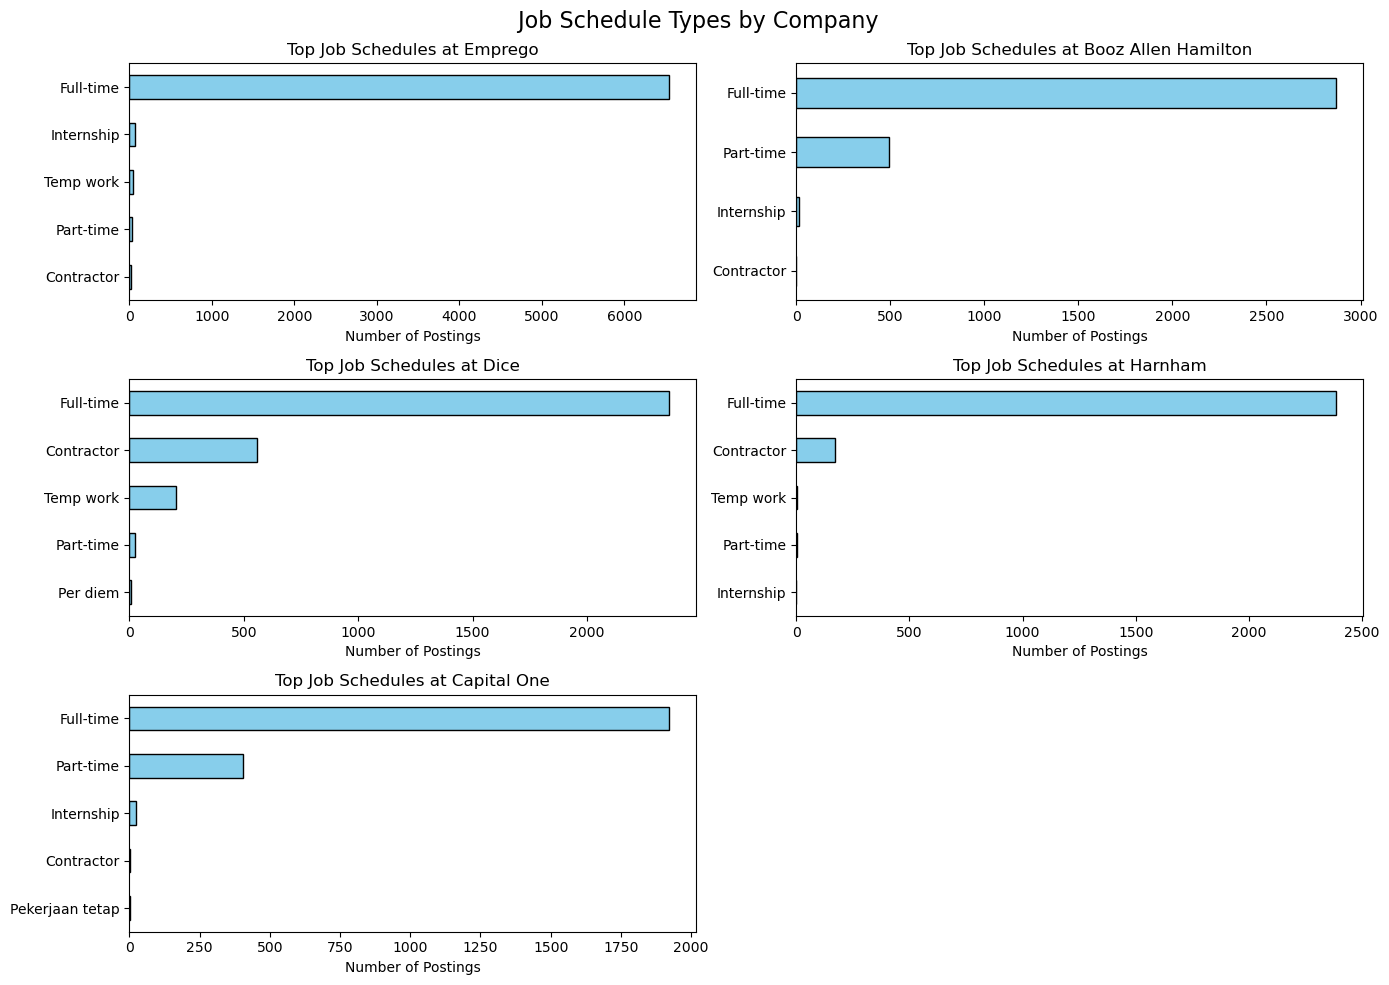

In [98]:
# Pick 5 companies (or top 5 with most jobs)
companies = df_exploded["company_name"].value_counts().head().index.tolist()

# Create subplots grid (e.g. 3 rows x 2 cols if 5 companies)
fig, axes = plt.subplots(3, 2, figsize=(14, 10))
axes = axes.flatten()

for i, company in enumerate(companies):
    top_schedules = (
        df_exploded[df_exploded["company_name"] == company]["job_schedule_type"]
        .value_counts()
        .head(5)
    )

    top_schedules.plot(kind="barh", ax=axes[i], color="skyblue", edgecolor="black")
    axes[i].set_title(f"Top Job Schedules at {company}")
    axes[i].set_xlabel("Number of Postings")
    axes[i].invert_yaxis()  # highest on top
    axes[i].set_ylabel("")
    axes[i].legend().set_visible(False)

# Remove unused subplot (since 5 companies, but 6 slots in grid)
fig.delaxes(axes[-1])

fig.suptitle(" Job Schedule Types by Company", fontsize=16)
plt.tight_layout()
plt.show()
